In this exploration notebook, we shall try to uncover the basic information about the dataset which will help us build our models / features. 

Let us first import the necessary modules.

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

/Users/Zoe/anaconda/envs/NN_tutorial/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Loading the training dataset and looking at the top few rows.

In [3]:
train_df = pd.read_json("../../localData/renthop/train.json")
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


Wow. This dataset looks interesting. It has numerical features, categorical features, date feature, text features and image features.  

Let's classify these features

In [3]:
numeric_list = ['bathrooms','bedrooms','price','latitude','longitude']
categorical_list = ['building_id','listing_id','manager_id']
time_list = ['created']
text_list = ['description','display_address','features','street_address']
image_list = ['photos']

Let us load the test data as well and check the number of rows in train and test to start with.

In [4]:
test_df = pd.read_json("../../localData/renthop/test.json")
print("Train Rows : ", train_df.shape)
print("Test Rows : ", test_df.shape)

('Train Rows : ', (49352, 15))
('Test Rows : ', (74659, 14))


extract year, month, day and hour from created information

In [5]:
train_df['created'] = pd.to_datetime(train_df['created'],format="%Y-%m-%d %H:%M:%S")
#test_df['created'] = pd.to_datetime(test_df['created'],format="%Y-%m-%d %H:%M:%S")

In [6]:
train_df['year'] = train_df.created.dt.year
train_df['month'] = train_df.created.dt.month
train_df['day'] = train_df.created.dt.day
train_df['hour'] = train_df.created.dt.hour

Does created time varies according to interest level(odds ratio)?

In [7]:
train_df[['year','month','day','hour','interest_level']].groupby('interest_level').median()

,year,month,day,hour
interest_level,,,,
high,2016,5,14,5
low,2016,5,15,3
medium,2016,5,15,5


hour seems most informative

**Target Variable**

Before delving more into the features, let us first have a look at the target variable 'interest level'

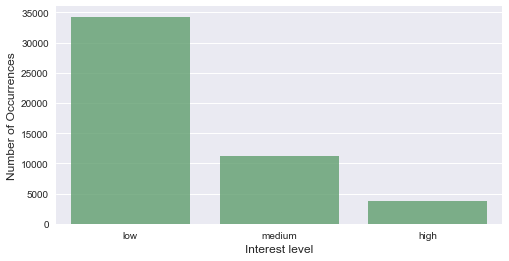

In [8]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

Interest level is low for most of the cases followed by medium and then high which makes sense.

Now let us start looking into the numerical features present in the dataset. Numerical features are

 - bathrooms
 - bedrooms
 - price
 - latitude
 - longitude

The last two are actually not numerical variables, but for now let us just consider it to be numerical.

Take a look at odds ratio for numerical variables

In [9]:
train_df[numeric_list+['interest_level']].groupby('interest_level').median()

,bathrooms,bedrooms,price,latitude,longitude
interest_level,,,,,
high,1.0,2,2400,40.7465,-73.9763
low,1.0,1,3300,40.7538,-73.9779
medium,1.0,2,2895,40.7488,-73.9781


price is informative, latitude and longitude are not that informative

**Bathrooms:**

Let us first start with bathrooms.

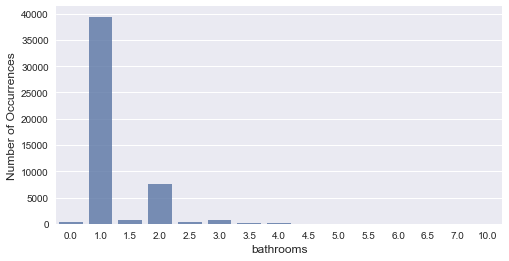

In [10]:
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

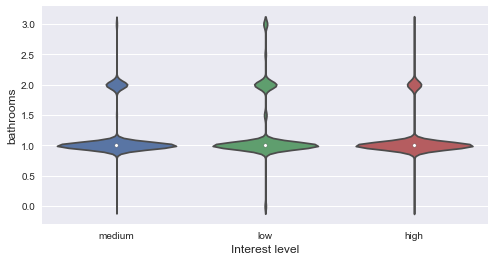

In [11]:
train_df['bathrooms'].ix[train_df['bathrooms']>3] = 3
plt.figure(figsize=(8,4))
sns.violinplot(x='interest_level', y='bathrooms', data=train_df)
plt.xlabel('Interest level', fontsize=12)
plt.ylabel('bathrooms', fontsize=12)
plt.show()

Looks like evenly distributed across the interest levels. Now let us look at the next feature 'bedrooms'.

**Bedrooms:**

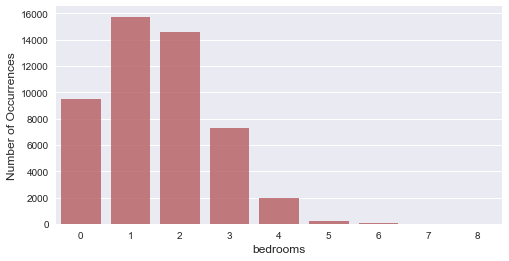

In [12]:
cnt_srs = train_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

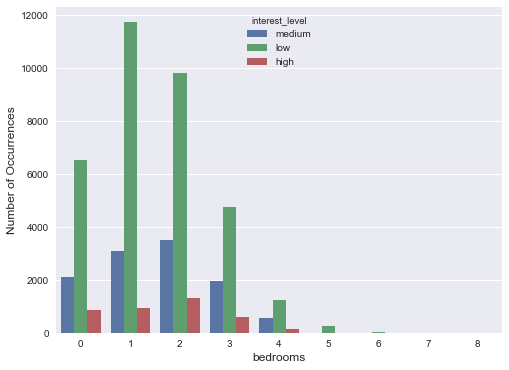

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

**Price:**

Now let us look at the price variable distribution.

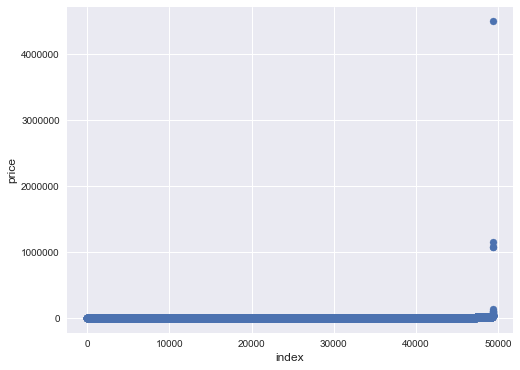

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

Looks like there are some outliers in this feature. So let us remove them and then plot again.

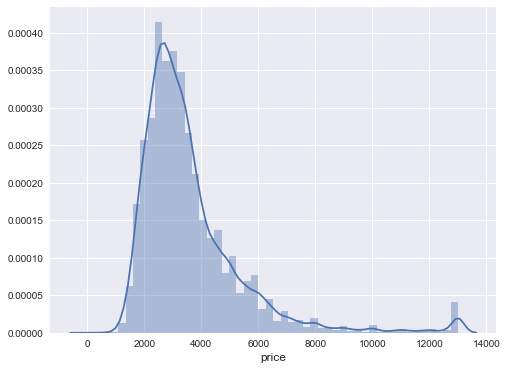

In [15]:
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].ix[train_df['price']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

The distribution is right skewed as we can see.

Now let us look at the latitude and longitude variables.

**Latitude & Longitude:**

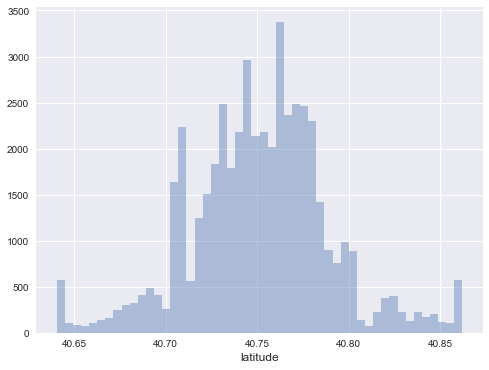

In [16]:
llimit = np.percentile(train_df.latitude.values, 1)
ulimit = np.percentile(train_df.latitude.values, 99)
train_df['latitude'].ix[train_df['latitude']<llimit] = llimit
train_df['latitude'].ix[train_df['latitude']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values, bins=50, kde=False)
plt.xlabel('latitude', fontsize=12)
plt.show()

So the latitude values are primarily between 40.6 and 40.9. Now let us look at the longitude values.

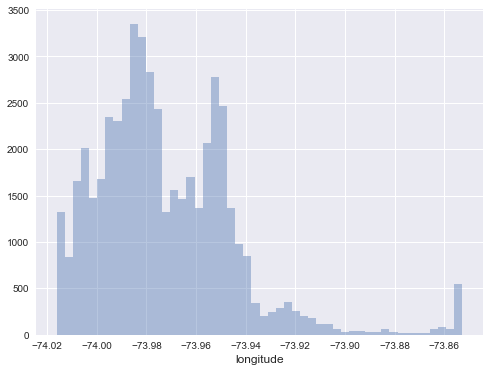

In [17]:
llimit = np.percentile(train_df.longitude.values, 1)
ulimit = np.percentile(train_df.longitude.values, 99)
train_df['longitude'].ix[train_df['longitude']<llimit] = llimit
train_df['longitude'].ix[train_df['longitude']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.longitude.values, bins=50, kde=False)
plt.xlabel('longitude', fontsize=12)
plt.show()

The longitude values range between -73.8 and -74.02. So the data corresponds to the **New York City**.

Now let us plot the same in a map. Thanks to this [kernel][1] by Dotman.


  [1]: https://www.kaggle.com/dotman/d/fivethirtyeight/uber-pickups-in-new-york-city/data-exploration-and-visualization

In [19]:
'''
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

west, south, east, north = -74.02, 40.64, -73.85, 40.86

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(train_df['longitude'].values, train_df['latitude'].values)
m.hexbin(x, y, gridsize=200,
         bins='log', cmap=cm.YlOrRd_r);
'''

"\nfrom mpl_toolkits.basemap import Basemap\nfrom matplotlib import cm\n\nwest, south, east, north = -74.02, 40.64, -73.85, 40.86\n\nfig = plt.figure(figsize=(14,10))\nax = fig.add_subplot(111)\nm = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,\n            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')\nx, y = m(train_df['longitude'].values, train_df['latitude'].values)\nm.hexbin(x, y, gridsize=200,\n         bins='log', cmap=cm.YlOrRd_r);\n"

**Created:**

Now let us look at the date column 'created' 

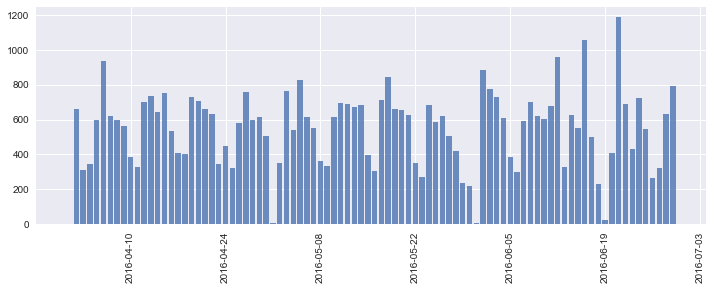

In [20]:
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["date_created"] = train_df["created"].dt.date
cnt_srs = train_df['date_created'].value_counts()


plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

So we have data from April to June 2016 in our train set. Now let us look at the test set as well and see if they are also from the same date range. 

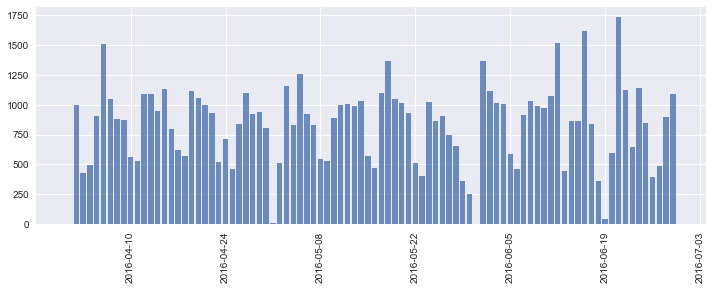

In [21]:
test_df["created"] = pd.to_datetime(test_df["created"])
test_df["date_created"] = test_df["created"].dt.date
cnt_srs = test_df['date_created'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

Looks very similar to the train set dates and so we are good to go.!

We shall also look at the hour-wise listing trend (Just for fun)

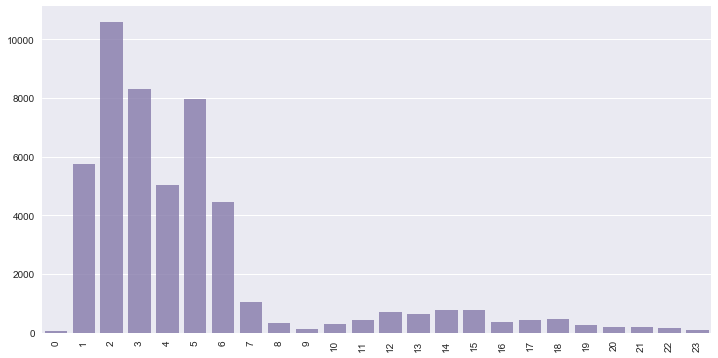

In [22]:
train_df["hour_created"] = train_df["created"].dt.hour
cnt_srs = train_df['hour_created'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.show()

Looks like listings are created during the early hours of the day (1 to 7am). May be that is when the traffic is less and so the updates are happening.

Now let us look at some of the categorical variables.

In [8]:
train_df.manager_id.value_counts().shape

(3481,)

In [9]:
train_df.building_id.value_counts().shape

(7585,)

In [10]:
train_df.listing_id.value_counts().shape #index

(49352,)

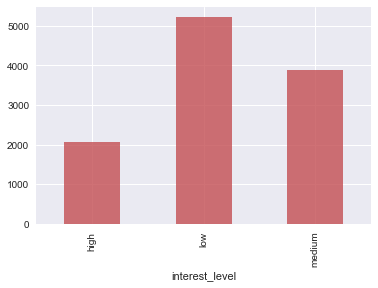

In [40]:
train_df[categorical_list+['interest_level']].groupby('interest_level')['building_id'].apply(lambda x: len(x.unique())).plot.bar(alpha=0.8,color=color[2])

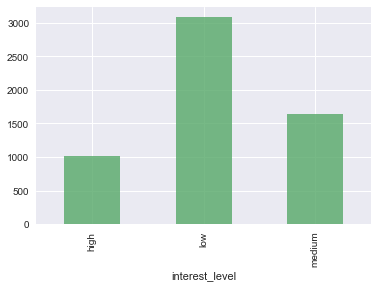

In [41]:
train_df[categorical_list+['interest_level']].groupby('interest_level')['manager_id'].apply(lambda x: len(x.unique())).plot.bar(alpha=0.8,color=color[1])

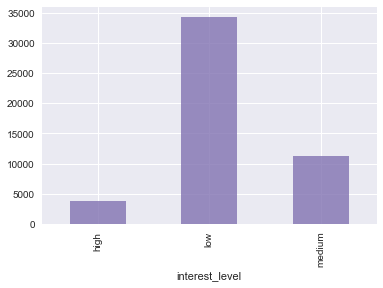

In [43]:
train_df[categorical_list+['interest_level']].groupby('interest_level')['listing_id'].apply(lambda x: len(x.unique())).plot.bar(alpha=0.8,color=color[3])

**Display Address:**

Display_address that appear less than 2 times: 63.22%
Display_address that appear less than 10 times: 89.6%
Display_address that appear less than 50 times: 97.73%
Display_address that appear less than 100 times: 99.26%
Display_address that appear less than 500 times: 100.0%


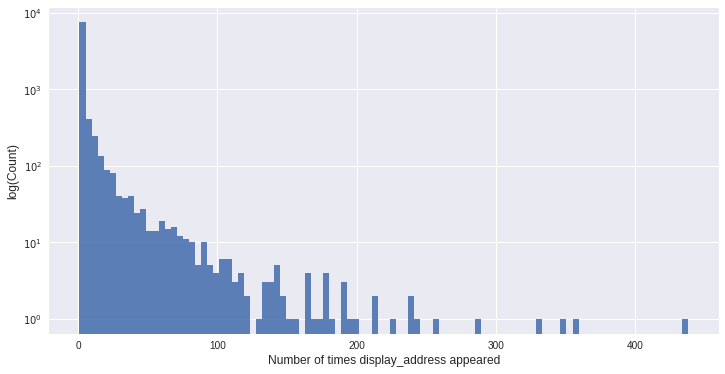

In [17]:
cnt_srs = train_df.groupby('display_address')['display_address'].count()

for i in [2, 10, 50, 100, 500]:
    print('Display_address that appear less than {} times: {}%'.format(i, round((cnt_srs < i).mean() * 100, 2)))

plt.figure(figsize=(12, 6))
plt.hist(cnt_srs.values, bins=100, log=True, alpha=0.9)
plt.xlabel('Number of times display_address appeared', fontsize=12)
plt.ylabel('log(Count)', fontsize=12)
plt.show()

Most of the display addresses occur less than 100 times in the given dataset. None of the display address occur more than 500 times.

**Number of Photos:**

This competition also has a huge database of photos of the listings. To start with, let us look at the number of photos given for listings.

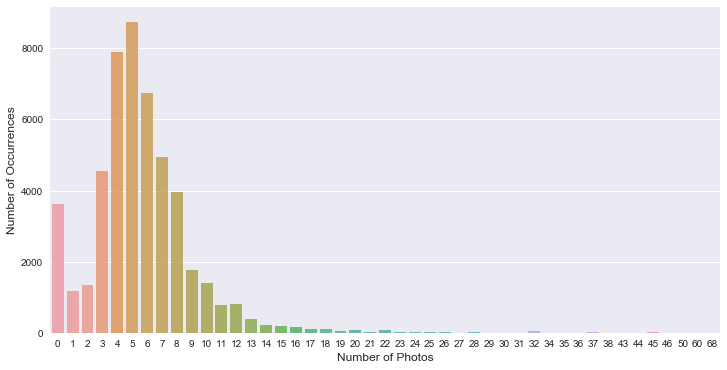

In [44]:
train_df["num_photos"] = train_df["photos"].apply(len)
cnt_srs = train_df['num_photos'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

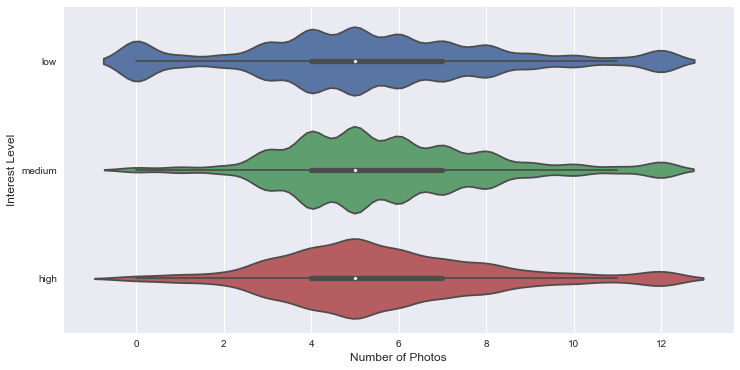

In [45]:
train_df['num_photos'].ix[train_df['num_photos']>12] = 12
plt.figure(figsize=(12,6))
sns.violinplot(x="num_photos", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

Let us now look at the number of features variable and see its distribution.

**Number of features:**

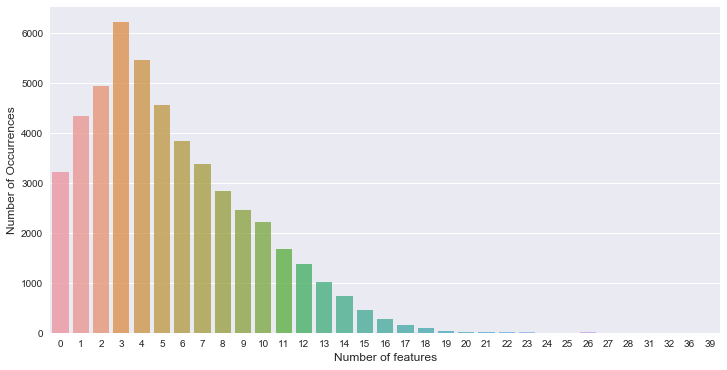

In [46]:
train_df["num_features"] = train_df["features"].apply(len)
cnt_srs = train_df['num_features'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of features', fontsize=12)
plt.show()

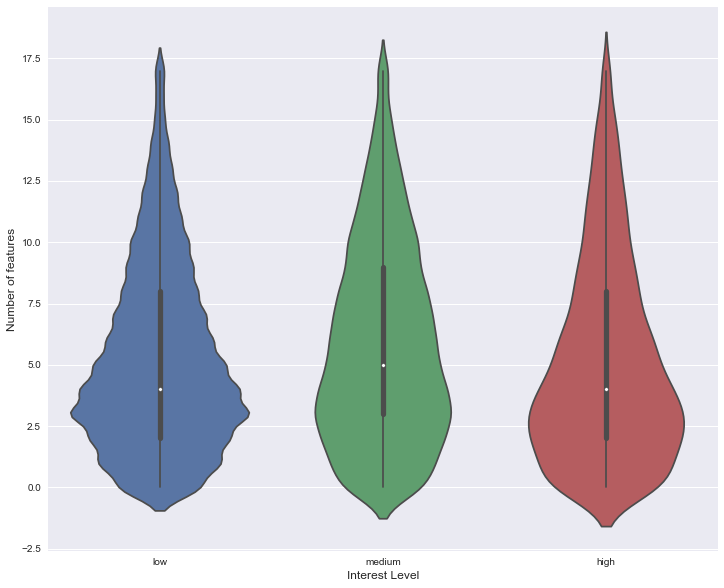

In [47]:
train_df['num_features'].ix[train_df['num_features']>17] = 17
plt.figure(figsize=(12,10))
sns.violinplot(y="num_features", x="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Interest Level', fontsize=12)
plt.ylabel('Number of features', fontsize=12)
plt.show()

In [48]:
train_df[['num_photos','num_features','interest_level']].groupby('interest_level').median()

,num_photos,num_features
interest_level,,
high,5,4
low,5,4
medium,5,5


**Word Clouds:**

Next we shall look into some for the text features.

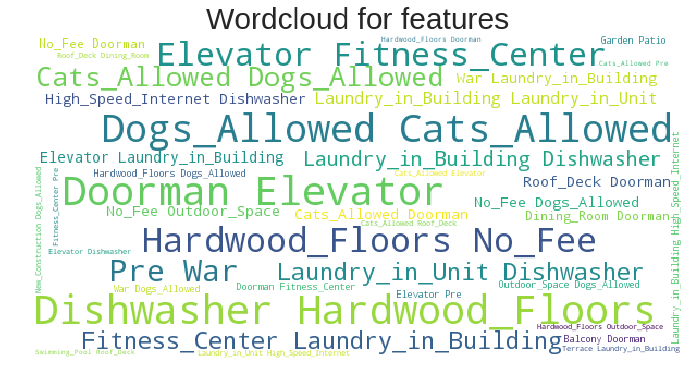

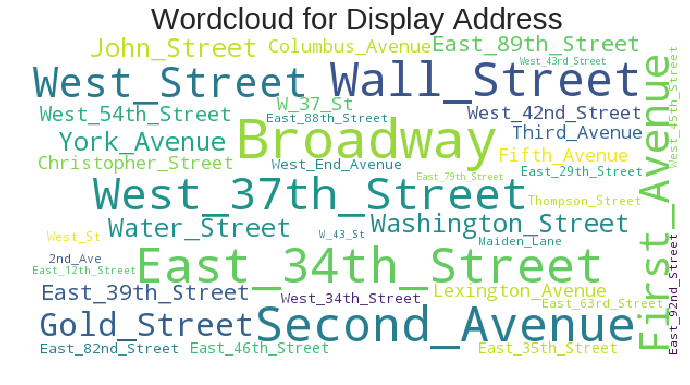

In [22]:
from wordcloud import WordCloud

text = ''
text_da = ''
text_desc = ''
for ind, row in train_df.iterrows():
    for feature in row['features']:
        text = " ".join([text, "_".join(feature.strip().split(" "))])
    text_da = " ".join([text_da,"_".join(row['display_address'].strip().split(" "))])
    #text_desc = " ".join([text_desc, row['description']])
text = text.strip()
text_da = text_da.strip()
text_desc = text_desc.strip()

plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for features", fontsize=30)
plt.axis("off")
plt.show()

# wordcloud for display address
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text_da)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for Display Address", fontsize=30)
plt.axis("off")
plt.show()


**More to come. Stay tuned.!**

Please upvote if you like the notebook :)